In [1]:
%matplotlib inline
from IPython.display import Image
from numpy import pi
import numpy as np
from qutip import *
from qutip_qip.operations import *
from qutip_qip.circuit import QubitCircuit, Gate
from qutip.qip.circuit import CircuitSimulator

In [2]:
qc = QubitCircuit(3,num_cbits=3)
#Q0 is qubit to send
#Q1 is Alice's control cubit
#Q2 is Bob's control cubit

In [3]:
# Set Q0 using a Hadamard
qc.add_gate("SNOT", targets=0)

In [4]:
# Create Bell state between Q1 and Q2
qc.add_gate("SNOT", targets=1)
qc.add_gate("CNOT", targets=[2], controls=1)

In [5]:
# Apply CNOT to Alice's qubits: Q0 is control, Q1 is target
qc.add_gate("CNOT", targets=[1], controls=0)

In [6]:
# Apply Hadamard on Q0, then measure Q0 and Q1
qc.add_gate("SNOT", targets=0)
qc.add_measurement("M0", targets=[0],classical_store=0)
qc.add_measurement("M1", targets=[1],classical_store=1)

In [7]:
# Apply CNOT on Bob's Q2 with measured Q1 as control
qc.add_gate("X", targets=[2], classical_controls=1)

In [8]:
# Apply conditioned Z on Bob's qubit Q2 using Q0 after measurement
qc.add_gate("Z", targets=2, classical_controls= 0)

In [9]:
# Measure Bob's Q2
#qc.add_measurement("M1", targets=[2])

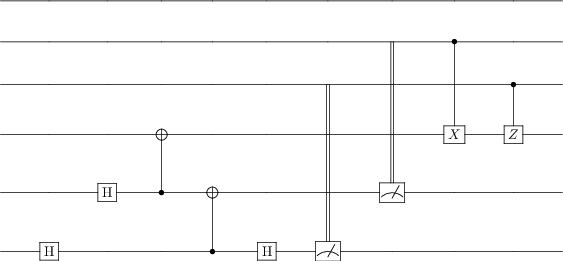

In [10]:
qc.png

In [11]:
zero_state = tensor([basis(2, 0), basis(2,0), basis(2,0)])

result = qc.run(state=zero_state)
print(result)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]


In [13]:
result.ptrace(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

In [14]:
(qutip.basis(2, 0) + qutip.basis(2, 1)).unit().proj()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]